In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

#rom sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Preprocessing

In [ ]:
df = pd.read_csv('Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1141 non-null   object 
 1   Open       1139 non-null   float64
 2   High       1139 non-null   float64
 3   Low        1139 non-null   float64
 4   Close      1139 non-null   float64
 5   Adj Close  1139 non-null   float64
 6   Volume     1139 non-null   float64
dtypes: float64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1.139000e+03
mean,14562.610759,14635.902662,14461.003014,14551.356859,14551.356859,4.333212e+05
std,3093.897262,3093.954635,3091.491571,3094.841948,3094.841948,2.200488e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,11612.449707,11663.199707,11544.849609,11595.575195,11595.575195,2.653000e+05
50%,15058.599609,15144.049805,14977.200195,15080.750000,15080.750000,3.663000e+05
75%,17465.625000,17589.725586,17381.450195,17511.275390,17511.275390,5.687000e+05
max,19850.900391,19991.849609,19758.400391,19979.150391,19979.150391,1.811000e+06


In [ ]:
df= df.dropna()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700.0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200.0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600.0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400.0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700.0


In [ ]:
df.drop('Adj Close',axis=1,inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [ ]:
df2=df.set_index('Date')

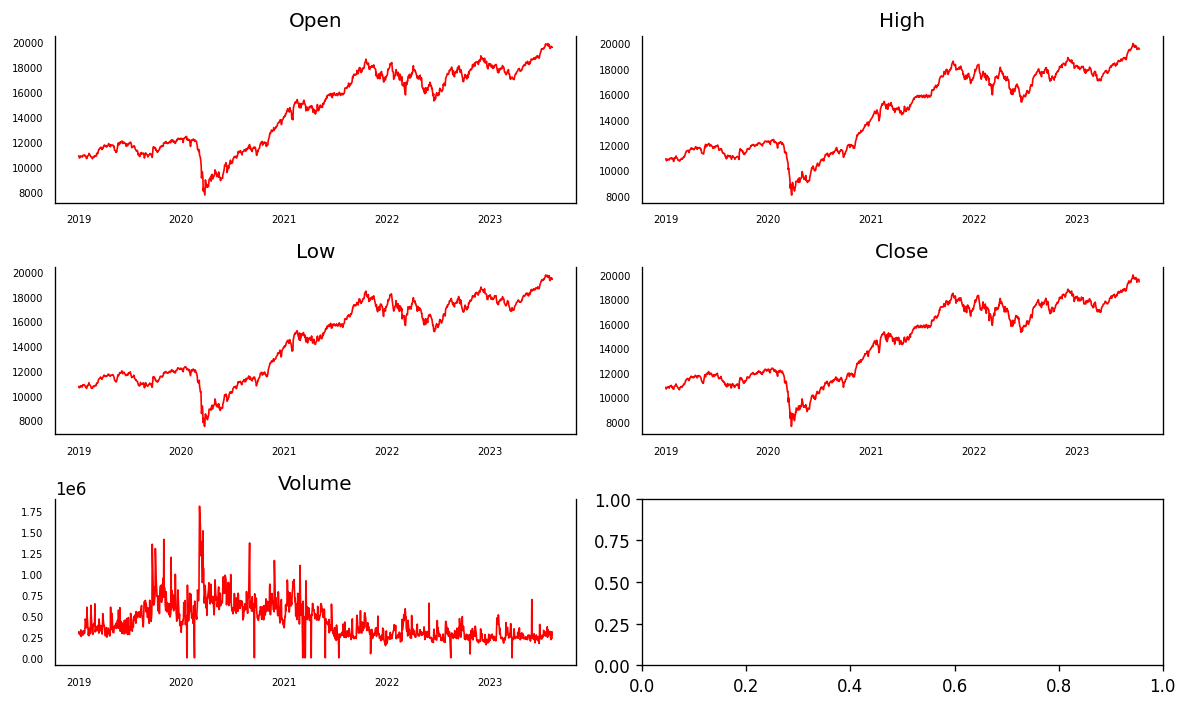

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    try:
      data = df2[df2.columns[i]]
      ax.plot(data, color='red', linewidth=1)
    # Decorations
      ax.set_title(df2.columns[i])
      ax.xaxis.set_ticks_position('none')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
    except:
      print("")
plt.tight_layout();

In [ ]:
len(df2)

1139

In [ ]:
0.75*len(df2)

854.25

In [ ]:
Train_df = df2[:854]
Test_df = df2[854:]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(Train_df)
scaled_train = scaler.transform(Train_df)
scaled_test = scaler.transform(Test_df)

In [ ]:
scaled_test

array([[0.71046824, 0.7258387 , 0.72330386, 0.73881448, 0.1451132 ],
       [0.71872246, 0.71241551, 0.72020355, 0.71806321, 0.12197681],
       [0.71006332, 0.7183819 , 0.71851616, 0.73125481, 0.14312535],
       ...,
       [1.08985306, 1.0985144 , 1.09348641, 1.10633304, 0.14715627],
       [1.0923146 , 1.09644197, 1.09603808, 1.09810144, 0.17239094],
       [1.0875939 , 1.09021063, 1.08847919, 1.08753726, 0.13003865]])

In [ ]:
#from pandas.core.internals.base import T
# train = Train_df
# scalers={}
# for i in Train_df.columns:
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
#     s_s=np.reshape(s_s,len(s_s))
#     scalers['scaler_'+ i] = scaler
#     train[i]=s_s
# test = Test_df
# for i in Train_df.columns:
#     scaler = scalers['scaler_'+i]
#     s_s = scaler.transform(test[i].values.reshape(-1,1))
#     s_s=np.reshape(s_s,len(s_s))
#     scalers['scaler_'+i] = scaler
#     test[i]=s_s

AttentionBased LSTM

In [ ]:
Look_back = 5
n_features = 5
generator = TimeseriesGenerator(scaled_train, scaled_train, length=Look_back, batch_size=1)

In [ ]:
type(generator[0])

tuple

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(Look_back, n_features), return_sequences=True))
model.add(Dropout(0.2))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(16))
#model.add(Dense(6))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             17920     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 30,949
Trainable params: 30,949
Non-traina

In [ ]:
history= model.fit(generator,epochs=25)

Epoch 1/25
849/849 [==============================] - 46s 44ms/step - loss: 0.0240 - root_mean_squared_error: 0.1550
Epoch 2/25
849/849 [==============================] - 22s 26ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810
Epoch 3/25
849/849 [==============================] - 22s 26ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726
Epoch 4/25
849/849 [==============================] - 26s 31ms/step - loss: 0.0044 - root_mean_squared_error: 0.0664
Epoch 5/25
849/849 [==============================] - 21s 24ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675
Epoch 6/25
849/849 [==============================] - 20s 24ms/step - loss: 0.0048 - root_mean_squared_error: 0.0691
Epoch 7/25
849/849 [==============================] - 21s 24ms/step - loss: 0.0043 - root_mean_squared_error: 0.0652
Epoch 8/25
849/849 [==============================] - 21s 25ms/step - loss: 0.0042 - root_mean_squared_error: 0.0650
Epoch 9/25
849/849 [==============================] - 19s 23ms/s

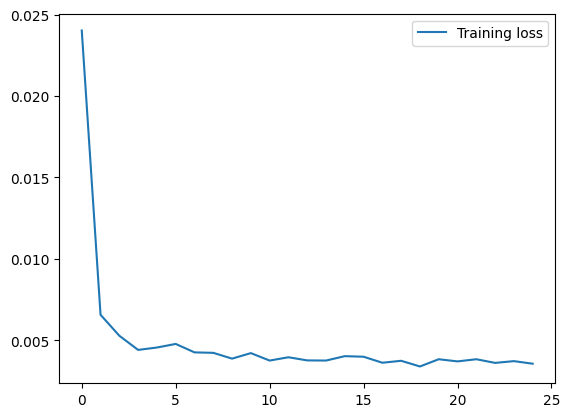

In [ ]:
plt.plot(history.history['loss'], label='Training loss')

plt.legend()

In [ ]:
generator_test = TimeseriesGenerator(scaled_test, scaled_test, length=Look_back, batch_size=1)

In [ ]:
Predict = model.predict(generator_test)

280/280 [==============================] - 1s 3ms/step


In [ ]:
true_predict = scaler.inverse_transform(Predict)

In [ ]:
true_predict

array([[ 15573.903,  15703.598,  15525.536,  15695.697, 376447.12 ],
       [ 15628.193,  15758.806,  15579.462,  15750.651, 373719.5  ],
       [ 15588.536,  15719.101,  15539.987,  15711.406, 378674.44 ],
       ...,
       [ 18269.55 ,  18452.05 ,  18199.55 ,  18428.98 , 267635.75 ],
       [ 18269.682,  18452.193,  18199.72 ,  18429.094, 267477.34 ],
       [ 18254.809,  18437.129,  18185.102,  18414.12 , 268286.5  ]],
      dtype=float32)

In [ ]:
# test_predictions = []

# first_eval_batch = scaled_train[-Look_back:]
# current_batch = first_eval_batch.reshape((1, Look_back, n_features))

# for i in range(len(Test_df)):

#     # get the prediction value for the first batch
#     current_pred = model.predict(current_batch)[0]

#     # append the prediction into the array
#     test_predictions.append(current_pred)

#     # use the prediction to update the batch and remove the first value
#     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
Predicted_df = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [ ]:
def mat_to_df(mat,dataframe):
    for i,row in enumerate(mat):
        #print(i)
        #print(row)
        dataframe.loc[i]=row

In [ ]:
mat_to_df(true_predict,Predicted_df)

In [ ]:
Predicted_df

,Open,High,Low,Close,Volume
0,15573.903320,15703.597656,15525.536133,15695.697266,376447.12500
1,15628.193359,15758.805664,15579.461914,15750.651367,373719.50000
2,15588.536133,15719.100586,15539.987305,15711.406250,378674.43750
3,15612.361328,15743.633789,15563.614258,15736.093750,378896.12500
4,15578.739258,15709.739258,15530.090820,15702.562500,382229.50000
...,...,...,...,...,...
275,18245.304688,18427.783203,18175.625000,18405.080078,270324.28125
276,18273.451172,18456.132812,18203.441406,18433.148438,267985.21875
277,18269.550781,18452.050781,18199.550781,18428.980469,267635.75000
278,18269.681641,18452.193359,18199.720703,18429.093750,267477.34375


Text(0, 0.5, 'Open')

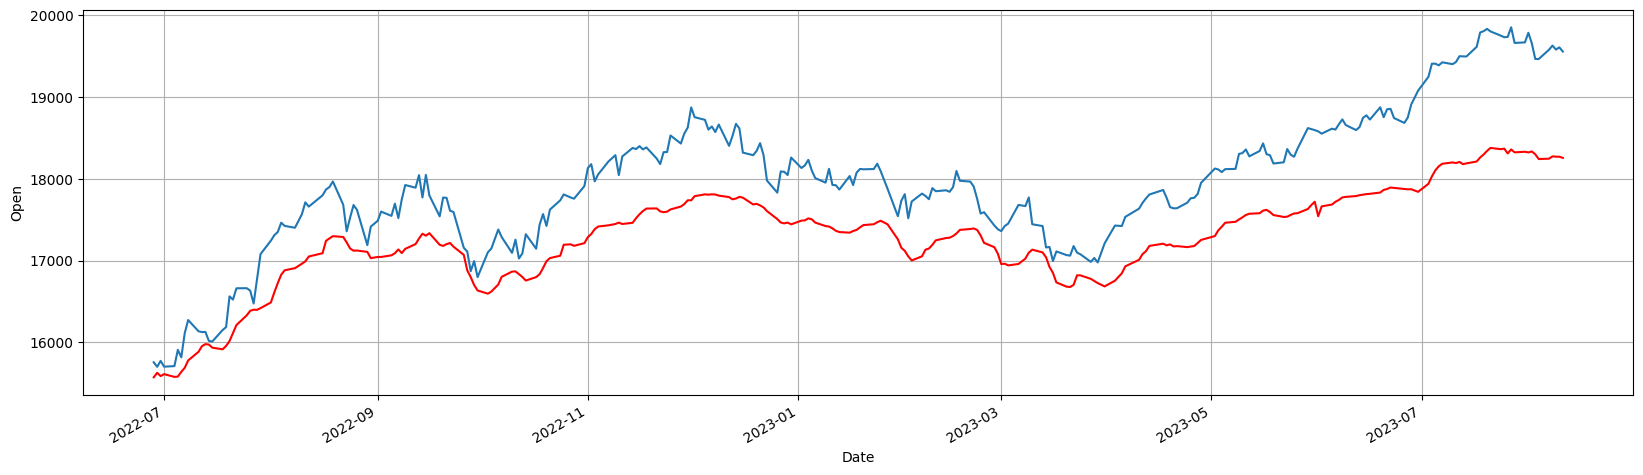

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Test_df[5:].index,Predicted_df.Open,color="Red")
plt.plot(Test_df[5:].index,Test_df[5:].Open)
#plt.plot(df.Date,df.Open,color="Red")
plt.grid()
plt.xticks(rotation=30, ha='right')
plt.xlabel('Date')
plt.ylabel('Open')

In [ ]:
my_rho = np.corrcoef(Test_df[5:].Open,Predicted_df.Open)

## R2 score

In [ ]:
my_rho

array([[1.        , 0.97665498],
       [0.97665498, 1.        ]])

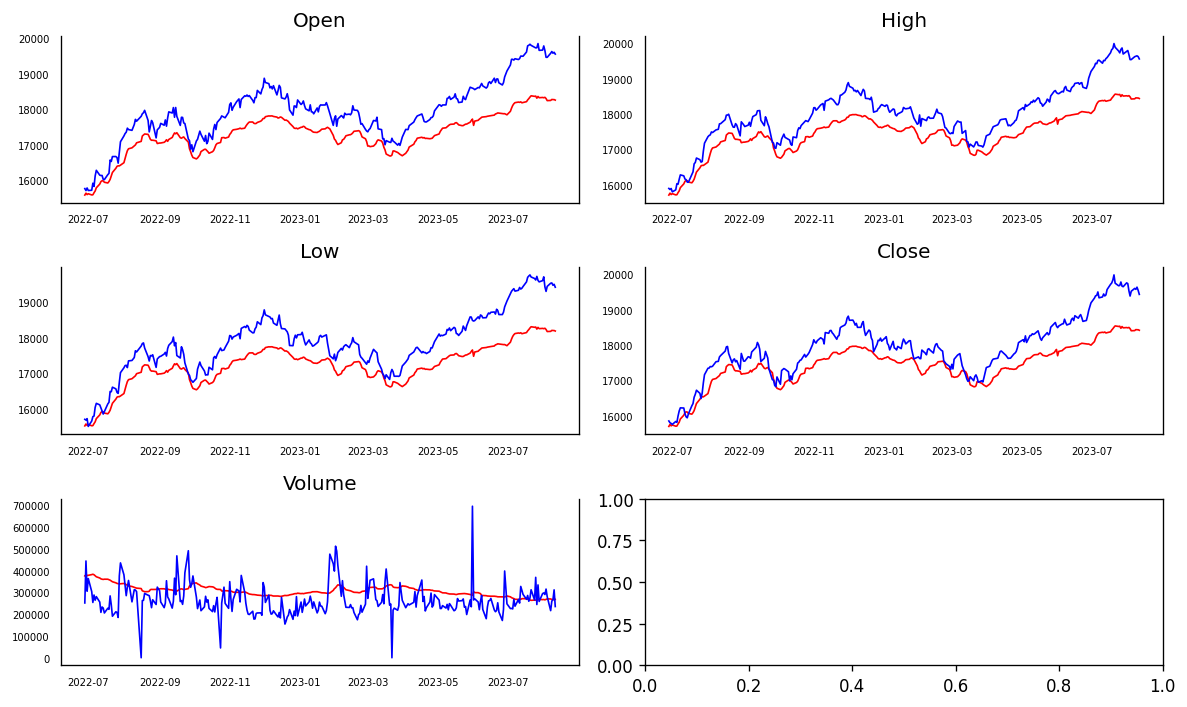

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    try:
      Predicteddata = Predicted_df[Predicted_df.columns[i]]
      Testdata = Test_df[Test_df.columns[i]]
      ax.plot(Test_df[5:].index,Predicteddata, color='red', linewidth=1)
      ax.plot(Test_df[5:].index,Testdata[5:], color='Blue', linewidth=1)
      # Decorations
      ax.set_title(Predicted_df.columns[i])
      ax.xaxis.set_ticks_position('none')
      #ax.xticks(rotation=30, ha='right')
      ax.yaxis.set_ticks_position('none')
      ax.spines["top"].set_alpha(0)
      ax.tick_params(labelsize=6)
    except:
      print("")
plt.tight_layout();

Auto Arima

In [ ]:
data = df2

In [ ]:
from pyramid.arima import auto_arima

SyntaxError: ignored

In [ ]:

train = data[:854]
valid = data[854:]

training = train['Close']
validation = valid['Close']

In [ ]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

In [ ]:


model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

In [ ]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

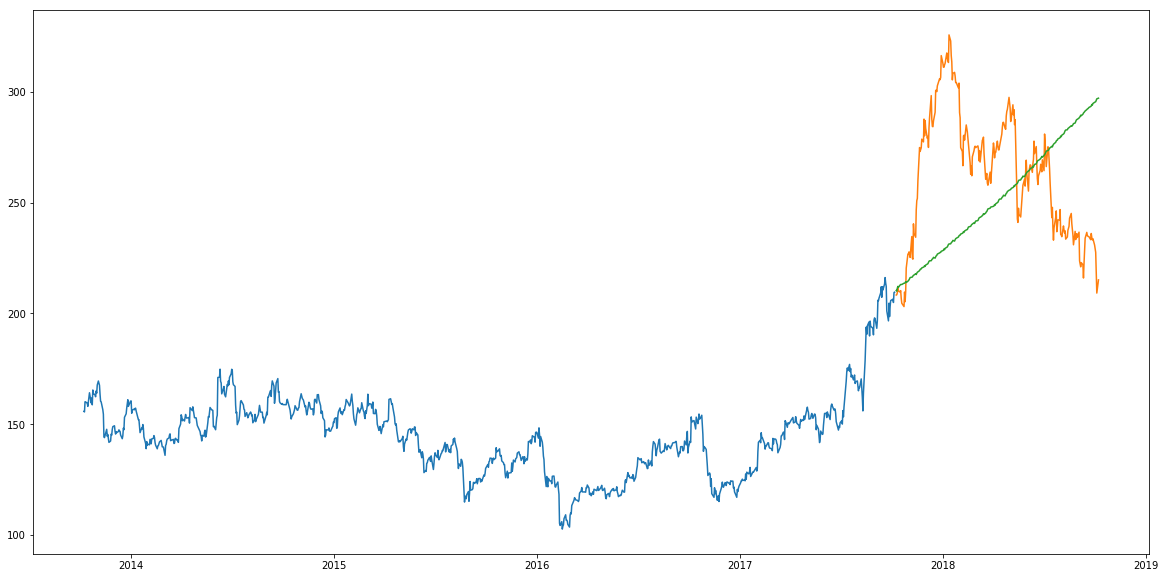

Facebook Prophet

In [ ]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:854]
valid = new_data[854:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

In [ ]:
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

In [ ]:

#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])



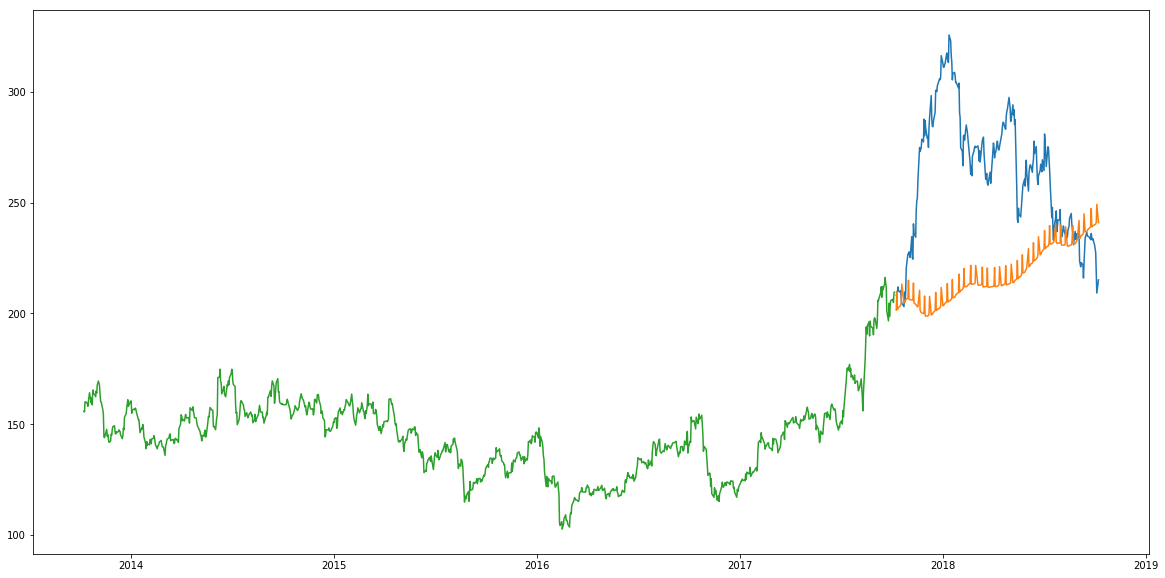